# Assignment 1

In [3]:
# The Import Zone
import matplotlib.pyplot as plt
import numpy as np

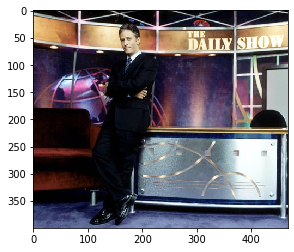

In [4]:
# Load the image.
image = plt.imread('DailyShow.jpg')
# Display the image.
plt.figure()
plt.imshow(image)
plt.show()

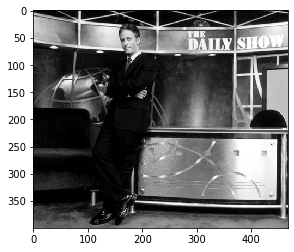

In [5]:
from skimage import color
# Convert the image to grayscale.
image_gray = color.rgb2gray(image)
# Display the grayscale image.
plt.figure()
plt.imshow(image_gray, cmap = 'gray')
plt.show()

# Task 2: Edge Detection

In [12]:
from scipy import ndimage

In [10]:
h1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

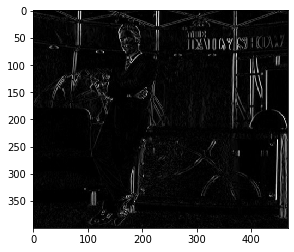

In [30]:
M1 = ndimage.filters.convolve(image_gray, h1)
mag_M1 = np.abs(M1)
plt.figure()
plt.imshow(mag_M1, cmap = 'gray')
plt.show()

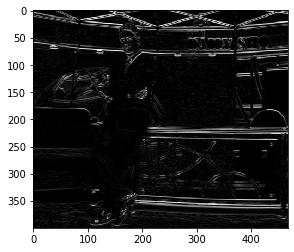

In [33]:
M2 = ndimage.filters.convolve(image_gray, h2)
mag_M2 = np.abs(M2)
plt.figure()
plt.imshow(mag_M2, cmap = 'gray')
plt.show()

In [21]:
mag_Total = np.linalg.norm(np.sqrt(np.square(M1) + np.square(M2)))
print(mag_Total)

277.31189118312585


## Custom Images

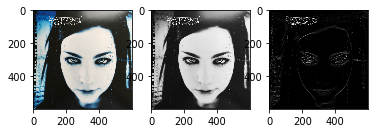

In [36]:
myimage2 = plt.imread('EvanesenceFallen.jpg')
myimage2_gray = color.rgb2gray(myimage2)
myimage2_vert = np.abs(ndimage.filters.convolve(myimage2_gray, h2))
fig = plt.figure()
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # middle side
ax3 = fig.add_subplot(133) # right side
ax1.imshow(myimage2)
ax2.imshow(myimage2_gray, cmap='gray')
ax3.imshow(myimage2_vert, cmap='gray')

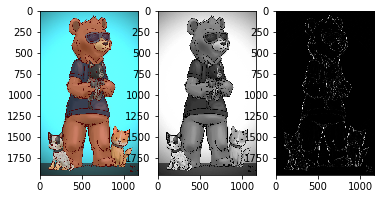

In [38]:
myimage1 = plt.imread('HeelerGang.png')
myimage1_gray = color.rgb2gray(myimage1)
myimage1_hori = np.abs(ndimage.filters.convolve(myimage1_gray, h1))
fig = plt.figure()
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # middle side
ax3 = fig.add_subplot(133) # right side
ax1.imshow(myimage1)
ax2.imshow(myimage1_gray, cmap='gray')
ax3.imshow(myimage1_hori, cmap='gray')

# Task 3: Downscaling

In [164]:
def downscaling(img, s):
    img_gray = color.rgb2gray(img)
    l, w = np.shape(img_gray)
    #new_img = np.array([[img_gray[y:y+s, x:x+s][0][0] for x in range(0,w,s)] for y in range(0,l,s)])
    new_img = []
    for y in range(0, l, s):
        new_row = []
        for x in range(0,w,s):
            pixels = np.array(img_gray[y:y+s, x:x+s])
            p_l, p_w = np.shape(pixels)
            new_row.append(pixels[(int)(p_l/2)][(int)(p_w/2)])
        new_img.append(new_row)
    return new_img

In [169]:
def downscaling_avg(img, s):
    img_gray = color.rgb2gray(img)
    l, w = np.shape(img_gray)
    #new_img = np.array([[img_gray[y:y+s, x:x+s][0][0] for x in range(0,w,s)] for y in range(0,l,s)])
    new_img = []
    for y in range(0, l, s):
        new_row = []
        for x in range(0,w,s):
            pixels = np.array(img_gray[y:y+s, x:x+s])
            new_row.append(np.mean(pixels))
        new_img.append(new_row)
    return new_img

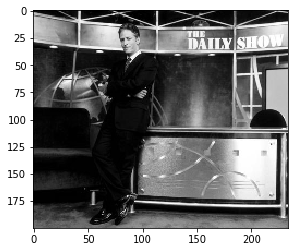

In [181]:
plt.figure()
plt.imshow(downscaling(image, 2))
plt.show()

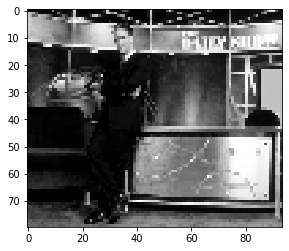

In [175]:
plt.figure()
plt.imshow(downscaling(image, 5))
plt.show()

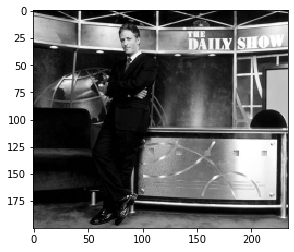

In [179]:
plt.figure()
plt.imshow(downscaling_avg(image, 2))
plt.show()

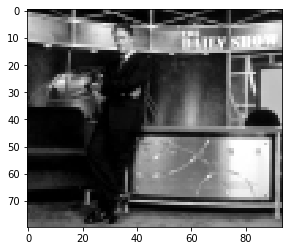

In [180]:
plt.figure()
plt.imshow(downscaling_avg(image, 5))
plt.show()

# Task 4: Flipping

Our guess is that x[N-n+1, m] will be the original image flipped vertically, x[n, M-m+1] will be the original image flipped horizontally, and x[N-n+1, M-m+1] will be the original image flipped vertically and horizontally.

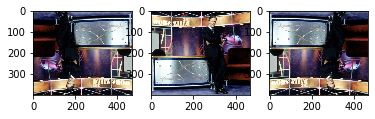

In [182]:
fig = plt.figure()
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # middle side
ax3 = fig.add_subplot(133) # right side
ax1.imshow(np.flipud(image))
ax2.imshow(np.fliplr(image))
ax3.imshow(np.fliplr(np.flipud(image)))

Explain why flipping in a given direction will implement the given transformation, using the numpy documentation.
Or just implement the dang heckin function and show the comparison.

# Assignment 5

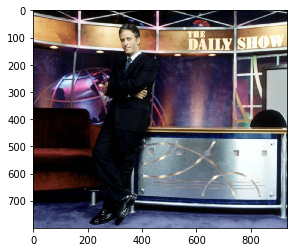

In [183]:
from skimage import transform
result = transform.resize(image, (2 * np.shape(image)[0], 2 * np.shape(image)[1]), order=1)
plt.figure()
plt.imshow(result)
plt.show()

In [184]:
np.shape(result)

(800, 936, 3)